In [1]:
#Perform the following operations using Python
#1. Scan all numeric variables for outliers. If there are outliers, use the following  techniques to deal with them.
#a)min max normalization b)z-score normalization c)Box plot


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns

In [69]:
df=pd.read_csv("StudentsPerformance_modified.csv")

In [70]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [71]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0
999,female,group D,some college,free/reduced,none,77,86.0,86.0


In [72]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [73]:
df.shape

(1000, 8)

In [74]:
df.size

8000

In [75]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [76]:
#applying fillna on the numeric columns
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [77]:
df['reading score'].fillna(df['reading score'].mean(),inplace=True)
df['writing score'].fillna(df['writing score'].mean(),inplace=True)

In [78]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  0
writing score                  0
dtype: int64

In [79]:
#apply mode for object or string
df['math score'].fillna(df['math score'].mode()[0],inplace=True)

In [80]:
df.isna().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [81]:
#converting the object to float type
df['math score']=df['math score'].astype('float')
#gives error due to presence of '? ' in data

ValueError: could not convert string to float: '?'

In [82]:
for i,value in enumerate(df['math score']):
    if value=='?':
        df['math score'][i]=0
        
#making ? as 0 so that it will not bother 

/tmp/ipykernel_13674/2473080708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math score'][i]=0


In [83]:
df['math score']=df['math score'].astype('float')

In [84]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [85]:
#extracting required featurs
marks=pd.concat([df['math score'],df['reading score'],df['writing score']],axis=1)

In [86]:
marks

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0
...,...,...,...
995,88.0,99.0,95.0
996,62.0,55.0,55.0
997,59.0,71.0,65.0
998,68.0,78.0,77.0


In [87]:
#making some copies for further operation
marks1=marks
marks2=marks
marks3=marks


In [89]:
#Applying minmax tranformation on marks1
max1=marks1['math score'].max()
min1=marks1['math score'].min()
#applying on math score column of marks1
for i,value in enumerate(marks1['math score']):
    marks1['math score'][i]=((value-min1)/(max1-min1))*(1-0)+0

In [90]:
max1=marks1['reading score'].max()
min1=marks1['reading score'].min()
#applying on reading score column of marks1
for i,value in enumerate(marks1['reading score']):
    marks1['reading score'][i]=((value-min1)/(max1-min1))*(1-0)+0

In [91]:
max1=marks1['writing score'].max()
min1=marks1['writing score'].min()
#applying on writing score column of marks1
for i,value in enumerate(marks1['writing score']):
    marks1['writing score'][i]=((value-min1)/(max1-min1))*(1-0)+0

In [93]:
marks1

,math score,reading score,writing score
0,0.380615,0.711340,0.114901
1,0.373522,0.896907,0.140036
2,0.423168,0.948454,0.149013
3,0.321513,0.556701,0.061041
4,0.390071,0.773196,0.116697
...,...,...,...
995,0.418440,0.989691,0.152603
996,0.356974,0.536082,0.080790
997,0.349882,0.701031,0.098743
998,0.371158,0.773196,0.120287


In [94]:
#applying z score on marks2
for column in marks2:
    std1=marks2[column].std()
    mean1=marks2[column].mean()
    for i,value in enumerate(marks2[column]):
        marks2[column][i]=(value-mean1)/std1

In [95]:
marks2

,math score,reading score,writing score
0,0.369986,0.241171,0.153332
1,0.231380,1.328631,0.629033
2,1.201624,1.630703,0.798926
3,-0.785066,-0.665045,-0.866026
4,0.554795,0.603658,0.187311
...,...,...,...
995,1.109220,1.872361,0.866883
996,-0.092035,-0.785874,-0.492261
997,-0.230641,0.180757,-0.152475
998,0.185178,0.603658,0.255268


In [ ]:
#IQR box plot

<AxesSubplot: >

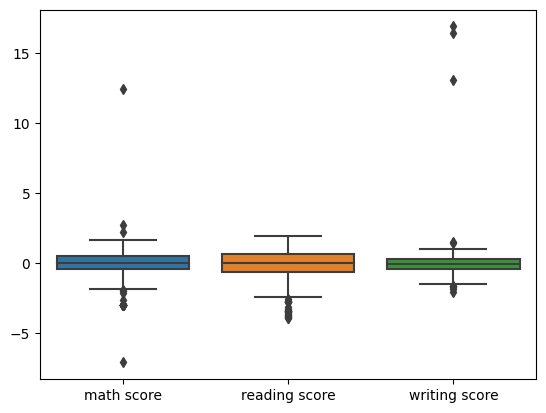

In [96]:
sns.boxplot(marks3)

In [97]:
Q1=marks3.quantile(0.25)
Q3=marks3.quantile(0.75)
IQR=Q3-Q1
print(IQR)

math score       0.970244
reading score    1.268703
writing score    0.713551
dtype: float64


In [98]:
low=Q1-IQR*1.5
high=Q3+IQR*1.5
print(low,high)

math score      -1.870815
reading score   -2.507685
writing score   -1.460651
dtype: float64 math score       2.010161
reading score    2.567127
writing score    1.393551
dtype: float64


In [103]:
new_marks=marks3[~((marks3<low ) | (marks3>high)).any(axis=1)]

In [104]:
print(marks3.size,new_marks.size)
print(marks3.shape,new_marks.shape)


3000 2787
(1000, 3) (929, 3)


<AxesSubplot: >

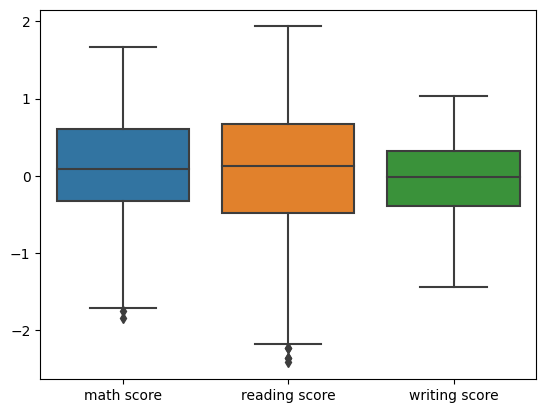

In [105]:
sns.boxplot(new_marks)

In [106]:
#here the ourliers are reemoved